In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
stock_data=pd.read_csv(r"/content/drive/MyDrive/Bohubrihi/Stock_Market_Data.csv")
stock_data.head()

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19


In [ ]:
stock_data['Date']=pd.to_datetime(stock_data['Date'],dayfirst=True)
stock_data.dtypes

Date      datetime64[ns]
Name              object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

**Part 1: Data Cleaning and Exploration:**

**Calculate basic summary statistics for each column (mean, median, standard deviation, etc**

In [ ]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,49158.000000,49158.000000,49158.000000,49158.000000,4.915800e+04
mean,157.869018,159.588214,155.906364,157.351462,5.619999e+05
std,520.191624,523.348078,517.136149,519.711667,1.276909e+06
min,3.900000,3.900000,3.000000,3.800000,1.000000e+00
25%,19.000000,19.300000,18.700000,19.000000,5.109475e+04
50%,40.300000,41.000000,39.535000,40.100000,1.824160e+05
75%,89.400000,90.500000,87.700000,88.700000,5.401398e+05
max,6000.000000,6050.000000,5975.000000,6000.500000,6.593180e+07


**Explore the distribution of the 'Close' prices over time**

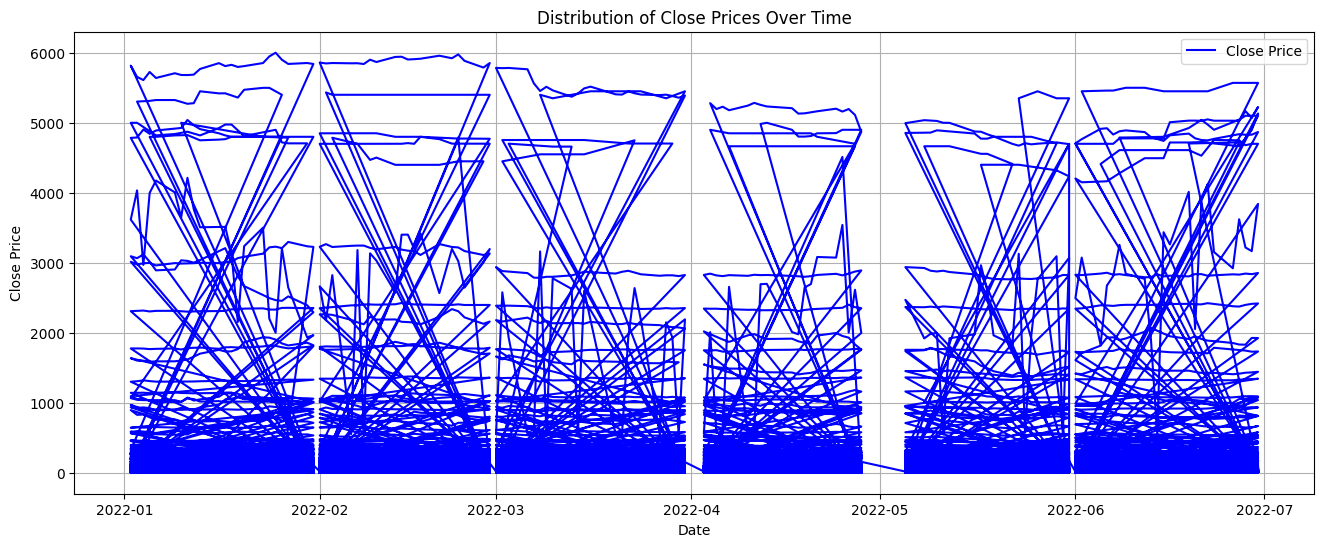

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

plt.figure(figsize=(16, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
plt.title('Distribution of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.legend()
plt.show()

**Identify and analyze any outliers (if any) in the dataset**



In [ ]:

z_scores = (stock_data['Close'] - stock_data['Close'].mean()) / stock_data['Close'].std()
z_threshold = 3
outliers = stock_data[abs(z_scores) > z_threshold]

print("Identified Outliers:")
print(outliers)

Identified Outliers:
            Date        Name     Open     High      Low    Close  Volume
462   2022-01-02     20.Bond  3634.00  3634.00  3609.00  3617.83   12.00
463   2022-01-03     20.Bond  4033.88  4040.13  4033.75  4034.50    4.75
464   2022-01-04     20.Bond  2979.50  2980.00  2930.00  2971.75   58.50
465   2022-01-05     20.Bond  3988.25  4013.25  3988.25  3998.88   64.25
466   2022-01-06     20.Bond  4169.00  4213.00  4167.00  4175.10    8.40
...          ...         ...      ...      ...      ...      ...     ...
48713 2022-06-26  UNILEVERCL  2810.10  2846.00  2810.10  2836.50  119.00
48714 2022-06-27  UNILEVERCL  2821.00  2845.00  2821.00  2832.20  217.00
48715 2022-06-28  UNILEVERCL  2840.00  2848.00  2840.00  2847.10  460.00
48716 2022-06-29  UNILEVERCL  2826.00  2855.00  2826.00  2839.00   68.00
48717 2022-06-30  UNILEVERCL  2850.00  2880.00  2828.00  2855.70  239.00

[941 rows x 7 columns]


**Part 2: Time Series Analysis / Rolling Window / Moving Averages :**

**Create a line chart to visualize the 'Close' prices over time**

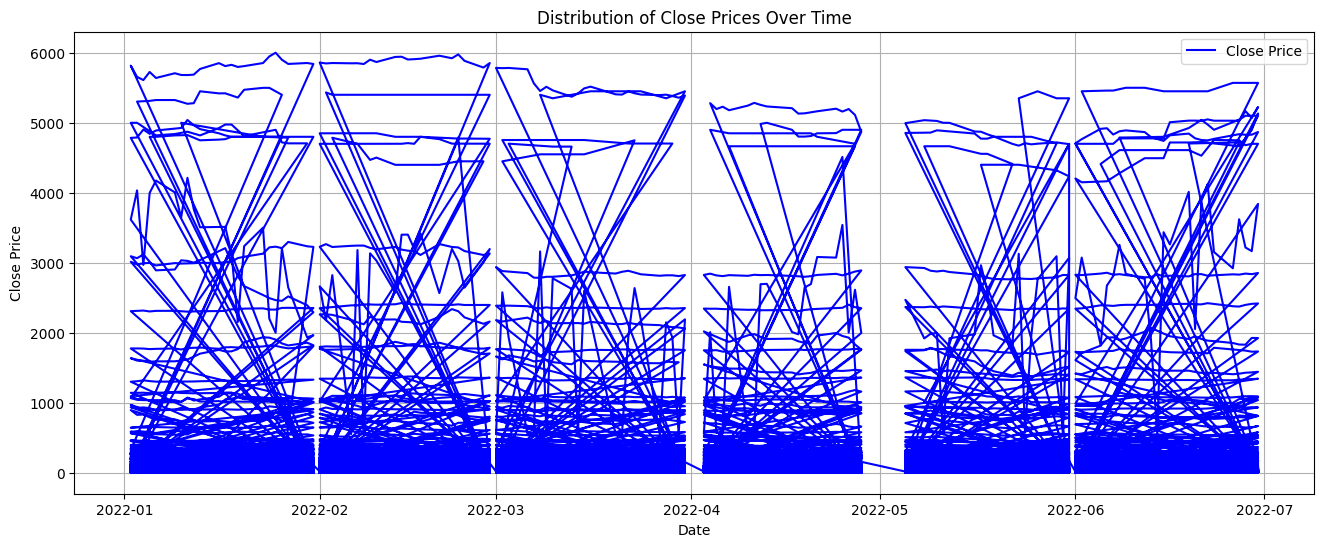

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

plt.figure(figsize=(16, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
plt.title('Distribution of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.legend()
plt.show()

**Calculate and plot the daily percentage change in closing prices**

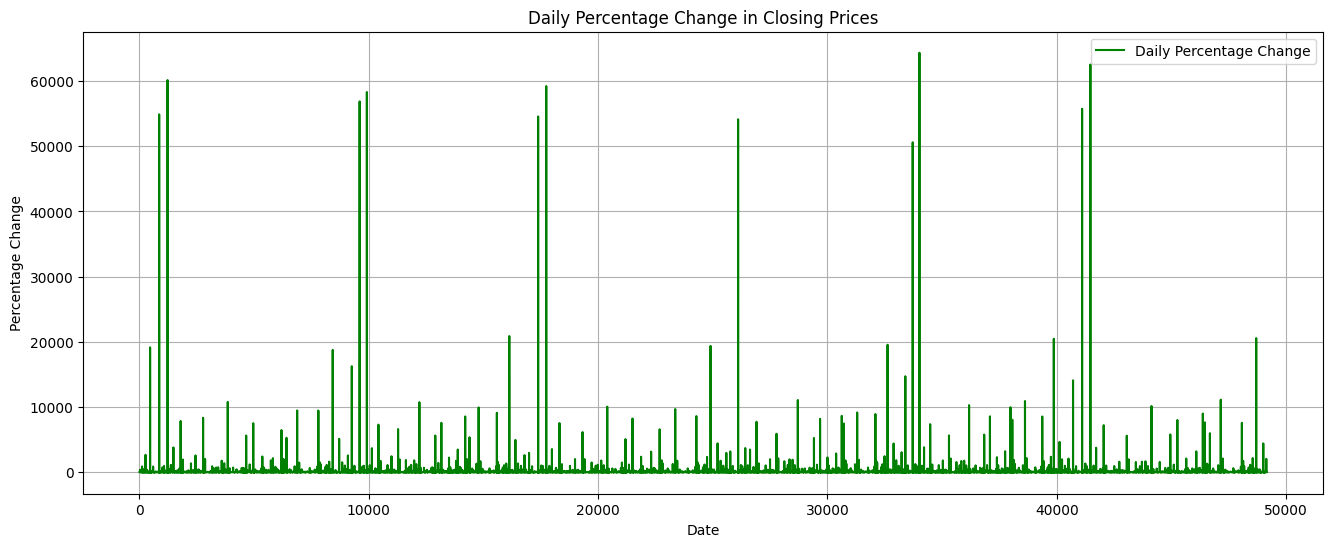

In [ ]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100

plt.figure(figsize=(16, 6))
plt.plot(stock_data.index, stock_data['Daily_Return'], label='Daily Percentage Change', color='green')
plt.title('Daily Percentage Change in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid()
plt.legend()
plt.show()

**Investigate the presence of any trends or seasonality in the stock prices**

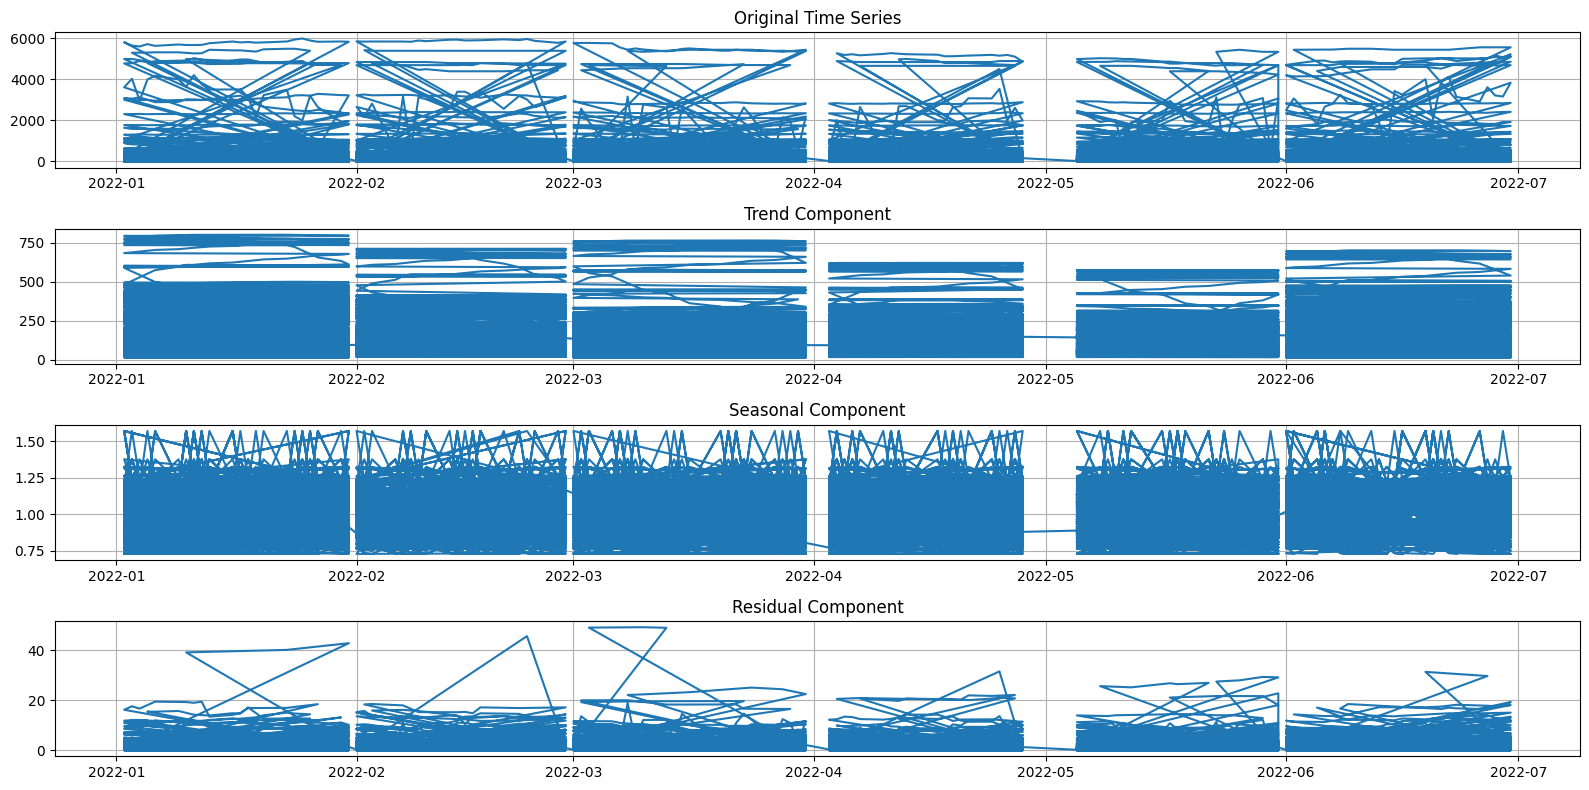

In [ ]:
stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')


result = seasonal_decompose(stock_data['Close'], model='multiplicative', period=252)


plt.figure(figsize=(16, 8))

plt.subplot(4, 1, 1)
plt.plot(stock_data['Date'], stock_data['Close'], label='Original')
plt.title('Original Time Series')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(stock_data['Date'], result.trend, label='Trend')
plt.title('Trend Component')
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(stock_data['Date'], result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(stock_data['Date'], result.resid, label='Residual')
plt.title('Residual Component')
plt.grid()

plt.tight_layout()
plt.show()

**Apply moving averages to smooth the time series data in 15/30 day intervals against the original graph**

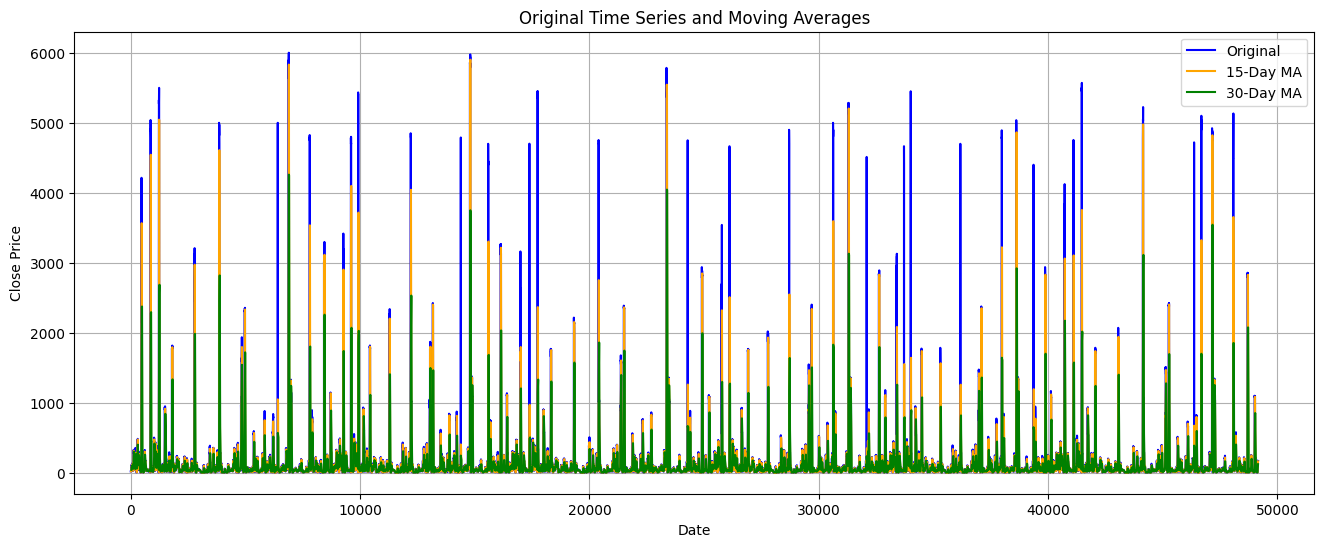

In [ ]:
stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')


stock_data['MA_15'] = stock_data['Close'].rolling(window=15).mean()
stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()


plt.figure(figsize=(16, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Original', color='blue')
plt.plot(stock_data.index, stock_data['MA_15'], label='15-Day MA', color='orange')
plt.plot(stock_data.index, stock_data['MA_30'], label='30-Day MA', color='green')
plt.title('Original Time Series and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.legend()
plt.show()

**Calculate the average closing price for each stock**

In [ ]:
average_closing_price = stock_data.groupby('Name')['Close'].mean()

print(average_closing_price)

Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64


**Identify the top 5 and bottom 5 stocks based on average closing price**

In [ ]:
average_closing_price = stock_data.groupby('Name')['Close'].mean()

top_5_stocks = average_closing_price.nlargest(5)
bottom_5_stocks = average_closing_price.nsmallest(5)

print("Top 5 Stocks:")
print(top_5_stocks)

print("\nBottom 5 Stocks:")
print(bottom_5_stocks)

Top 5 Stocks:
Name
APSCLBOND     5413.238636
RECKITTBEN    5342.024793
PREBPBOND     4918.357143
IBBL2PBOND    4851.330357
PBLPBOND      4836.195652
Name: Close, dtype: float64

Bottom 5 Stocks:
Name
FAMILYTEX     4.698361
ICBIBANK      4.725620
FBFIF         5.289344
POPULAR1MF    5.368033
PHPMF1        5.417213
Name: Close, dtype: float64


**Part 3: Volatility Analysis:**

**Calculate and plot the rolling standard deviation of the 'Close' prices**

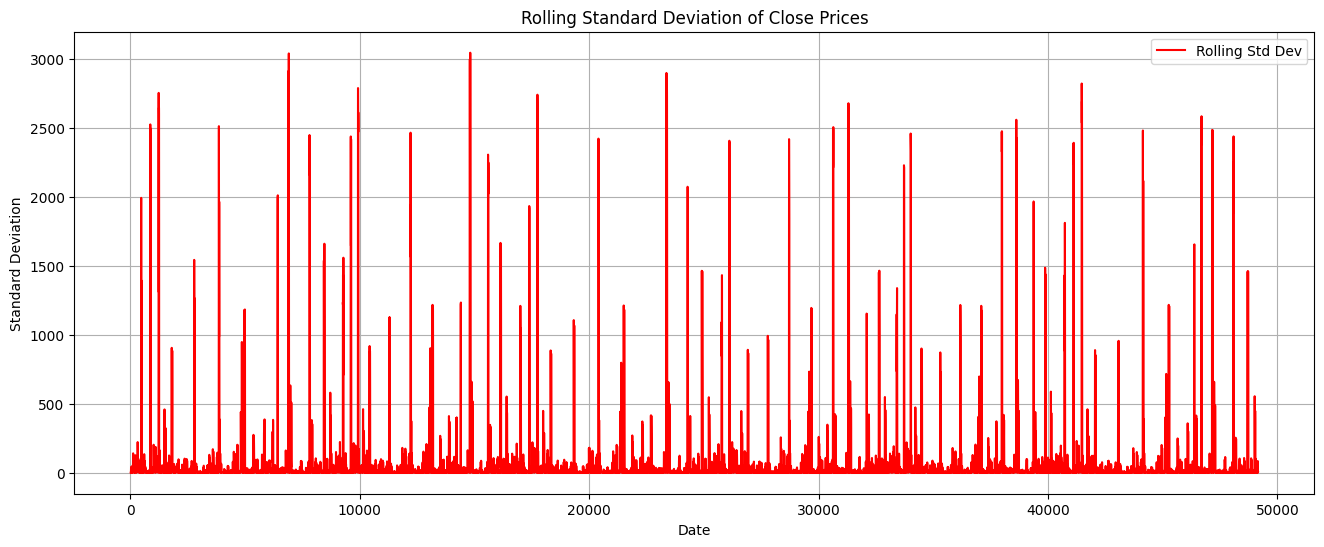

In [ ]:
rolling_std = stock_data['Close'].rolling(window=15).std()

plt.figure(figsize=(16, 6))
plt.plot(stock_data.index, rolling_std, label='Rolling Std Dev', color='red')
plt.title('Rolling Standard Deviation of Close Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.grid()
plt.legend()
plt.show()

**Create a new column for daily price change (Close - Open)**

In [ ]:
stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')
stock_data['Open'] = pd.to_numeric(stock_data['Open'], errors='coerce')

stock_data['Daily_Price_Change'] = stock_data['Close'] - stock_data['Open']

stock_data.head()

,Date,Name,Open,High,Low,Close,Volume,Daily_Return,MA_15,MA_30,Daily_Price_Change
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,NaN,NaN,NaN,0.10
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.130833,NaN,NaN,-0.13
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.262009,NaN,NaN,-0.01
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.612960,NaN,NaN,0.07
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,1.697128,NaN,NaN,0.25


**Analyze the distribution of daily price changes**

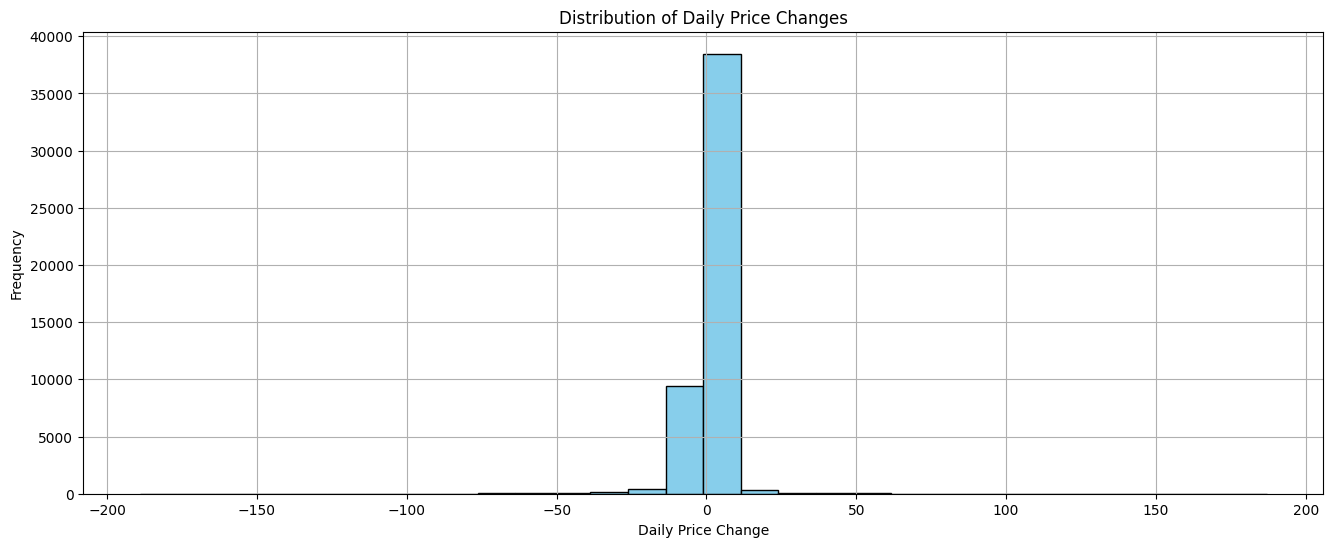

count    49158.000000
mean        -0.517556
std          6.400391
min       -189.200000
25%         -0.800000
50%         -0.100000
75%          0.200000
max        187.000000
Name: Daily_Price_Change, dtype: float64


In [ ]:
stock_data['Daily_Price_Change'] = stock_data['Close'] - stock_data['Open']

summary_statistics = stock_data['Daily_Price_Change'].describe()

plt.figure(figsize=(16, 6))
plt.hist(stock_data['Daily_Price_Change'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.grid()
plt.show()

print(summary_statistics)

**Identify days with the largest price increases and decreases**

In [ ]:
stock_data['Daily_Price_Change'] = stock_data['Close'] - stock_data['Open']

largest_increases = stock_data.nlargest(5, 'Daily_Price_Change')
largest_decreases = stock_data.nsmallest(5, 'Daily_Price_Change')

print("Days with the Largest Price Increases:")
print(largest_increases[['Date', 'Daily_Price_Change']])

print("\nDays with the Largest Price Decreases:")
print(largest_decreases[['Date', 'Daily_Price_Change']])

Days with the Largest Price Increases:
            Date  Daily_Price_Change
48081 2022-06-29               187.0
46684 2022-06-27               145.5
46681 2022-06-21               141.5
6878  2022-01-05               125.6
44145 2022-06-30               124.5

Days with the Largest Price Decreases:
            Date  Daily_Price_Change
23365 2022-03-07              -189.2
2774  2022-01-03              -182.5
31312 2022-04-28              -178.7
2786  2022-01-20              -166.6
6896  2022-01-31              -154.9


**Identify stocks with unusually high trading volume on certain days**

In [ ]:
stock_data['Volume'] = pd.to_numeric(stock_data['Volume'], errors='coerce')

z_scores_volume = (stock_data['Volume'] - stock_data['Volume'].mean()) / stock_data['Volume'].std()

z_threshold = 3

unusual_volume_days = stock_data[abs(z_scores_volume) > z_threshold]

print("Days with Unusually High Trading Volume:")
print(unusual_volume_days[['Date', 'Name', 'Volume']])

Days with Unusually High Trading Volume:
            Date                       Name       Volume
319   2022-01-17  15.Services_&_Real_Estate   6056375.75
320   2022-01-18  15.Services_&_Real_Estate   5141492.75
360   2022-01-12       17.Telecommunication   4952772.33
683   2022-01-03                 ACTIVEFINE   5109510.00
684   2022-01-04                 ACTIVEFINE  12712294.00
...          ...                        ...          ...
48718 2022-06-01                  UNIONBANK   7746766.00
48721 2022-06-06                  UNIONBANK   6885189.00
48739 2022-06-30                  UNIONBANK   6726621.00
49089 2022-06-28                        YPL   6145142.00
49090 2022-06-29                        YPL   4463125.00

[906 rows x 3 columns]


**Part 4: Correlation and Heatmaps:**

**Explore the relationship between trading volume and volatility**

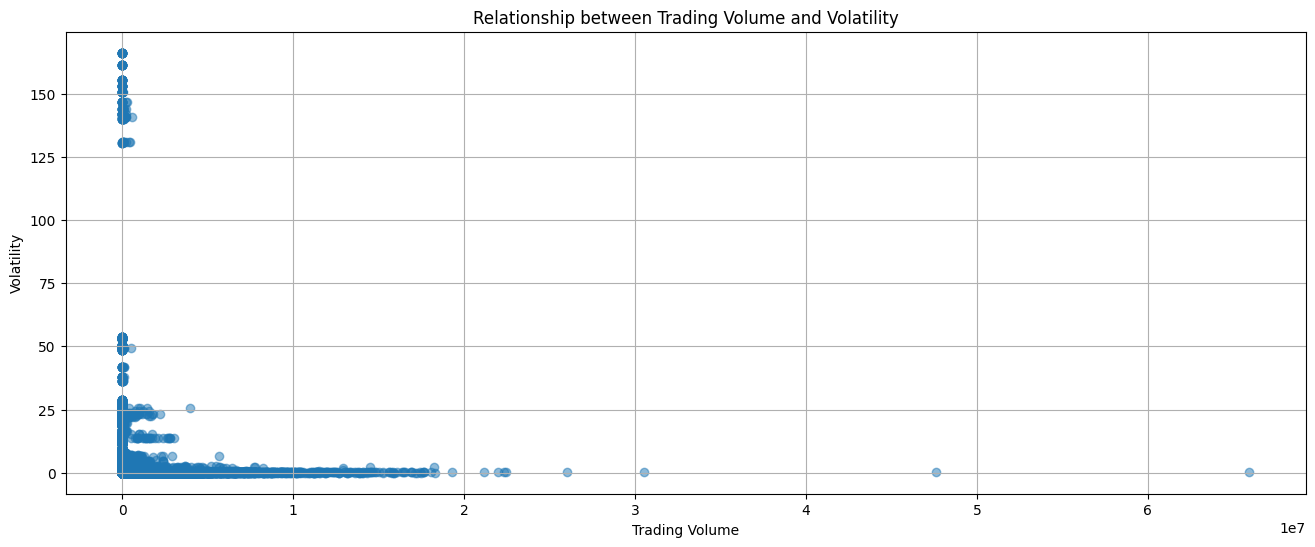

In [ ]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

rolling_volatility = stock_data['Daily_Return'].rolling(window=15).std()

plt.figure(figsize=(16, 6))
plt.scatter(stock_data['Volume'], rolling_volatility, alpha=0.5)
plt.title('Relationship between Trading Volume and Volatility')
plt.xlabel('Trading Volume')
plt.ylabel('Volatility')
plt.grid()
plt.show()

**Calculate the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices:**

In [ ]:
price_correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close']].corr()

print("Correlation Matrix:")
print(price_correlation_matrix)

Correlation Matrix:
           Open      High       Low     Close
Open   1.000000  0.999940  0.999939  0.999925
High   0.999940  1.000000  0.999887  0.999942
Low    0.999939  0.999887  1.000000  0.999961
Close  0.999925  0.999942  0.999961  1.000000


**Create a heatmap to visualize the correlations using the seaborn package:**

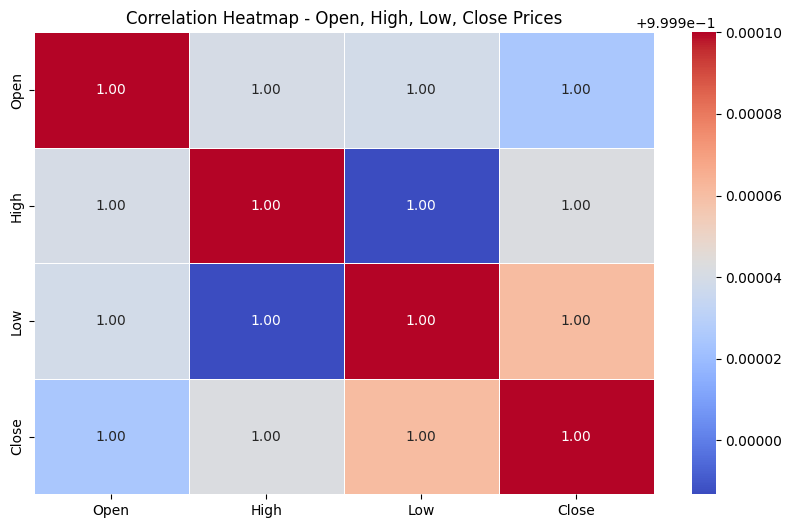

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(price_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap - Open, High, Low, Close Prices')
plt.show()

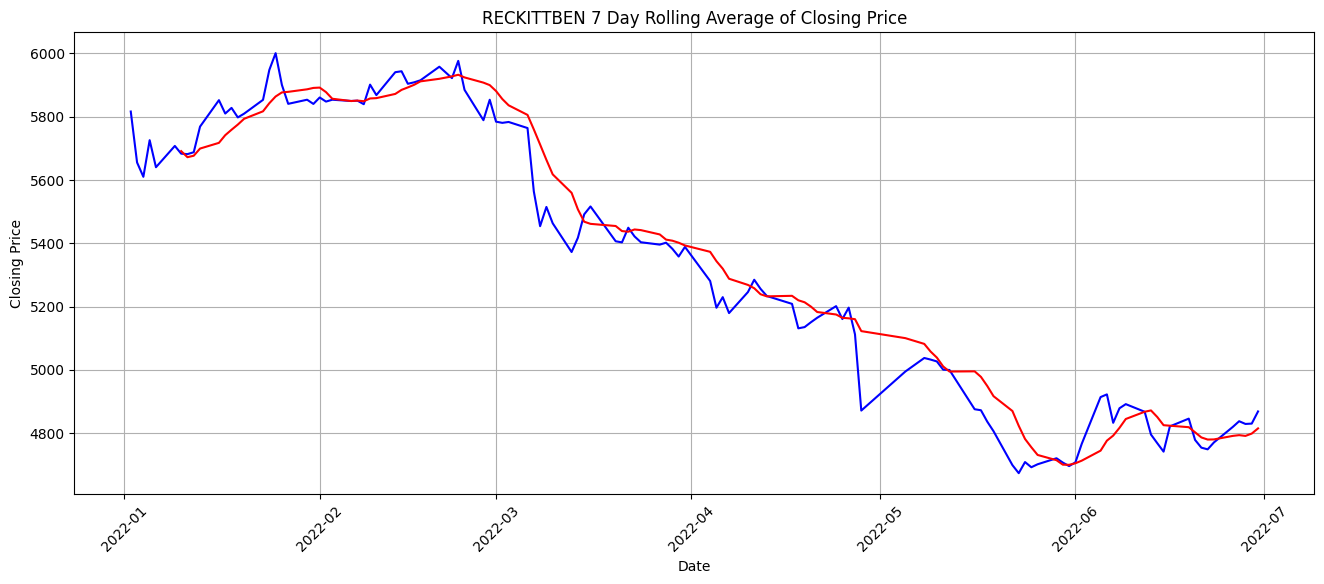

In [ ]:
specific_company='RECKITTBEN'
specific_data=stock_data[stock_data['Name']==specific_company].copy() # Use .copy() to avoid the warning
specific_data['7_Day_Rolling_Average']=specific_data['Close'].rolling(window=7).mean()
plt.figure(figsize=(16,6))
plt.plot(specific_data['Date'],specific_data['Close'],label=f'{specific_company} Closing Price',color='blue')
plt.plot(specific_data['Date'],specific_data['7_Day_Rolling_Average'],label=f'{specific_company} 7 Day Rolling Average of Closing Price',color='red')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{specific_company} 7 Day Rolling Average of Closing Price')

plt.grid()


plt.xticks(rotation=45)
plt.show()